In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
M=pd.read_excel('C:/Users/farou/Pictures/Screenshots/STAT/FICHIERRRR.xlsx')
M.head()
#C:/Users/farou/Pictures/Screenshots/STAT/M.xlsx

,Genre,age,A_E,MT_item1,MT_item2,MT_item3,For_item1
0,Homme,20,CI1,2,1,4,Option réfléchir
1,Homme,20,CI1,2,2,4,une bonne option
2,Femme,20,CI2,1,2,4,Option réfléchir
3,Femme,20,CI1,1,4,5,une bonne option
4,Homme,20,CI1,5,4,4,une bonne option


In [5]:
M.columns

Index(['Genre', 'age', 'A_E', 'MT_item1', 'MT_item2', 'MT_item3', 'For_item1'], dtype='object')

In [6]:
M=M[['A_E','MT_item1','MT_item2','MT_item3','For_item1']]
#M['Genre'].replace(["Homme","Femme"],[1,0],inplace=True)
M['A_E'].replace(['CI1','CI2'],[1,2],inplace=True)
M['MT_item1'].replace(["A tout à fait d'accord","d'accord","neutre","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)


M['MT_item3'].replace(["A tout à fait d'accord","d'accord","neutre","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)
M['MT_item2'].replace(["A tout à fait d'accord","d'accord","neutre","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)

#P['ITEM1'].replace(["A tout à fait d'accord","d'accord","Sans Opinion","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)

M['For_item1'].replace(["Option réfléchir","une bonne option","pas d'avis clair sur ce sujet","une option à éviter"],[1,2,3,4],inplace=True)
M.head()

,A_E,MT_item1,MT_item2,MT_item3,For_item1
0,1,2,1,4,1
1,1,2,2,4,2
2,2,1,2,4,1
3,1,1,4,5,2
4,1,5,4,4,2


In [7]:
Y=M['For_item1']
X=M.drop('For_item1',axis=1)
X0=M.iloc[:,0]
X1=M.iloc[:,1]
X2=M.iloc[:,2]
X3=M.iloc[:,3]
#X4=M.iloc[:,4]
X.head()

,A_E,MT_item1,MT_item2,MT_item3
0,1,2,1,4
1,1,2,2,4
2,2,1,2,4
3,1,1,4,5
4,1,5,4,4


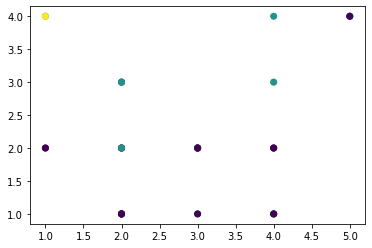

In [8]:
plt.scatter(X1,X2,c=Y)

In [9]:
X.head()


,A_E,MT_item1,MT_item2,MT_item3
0,1,2,1,4
1,1,2,2,4
2,2,1,2,4
3,1,1,4,5
4,1,5,4,4


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)
print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (34, 4)
Test set : (9, 4)


In [32]:
X_test.iloc[:,0]

18    1
39    2
34    2
3     1
32    2
6     1
19    1
41    2
27    2
Name: A_E, dtype: int64

Text(0.5, 1.0, 'Test set')

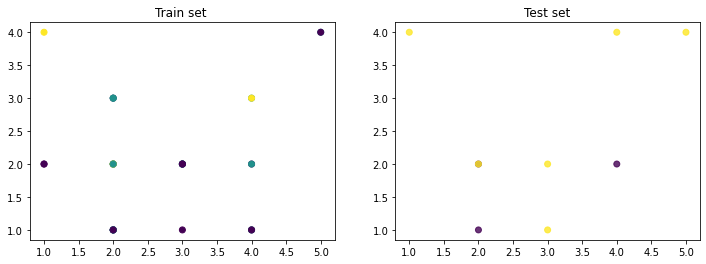

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(121)
X1=X_train.iloc[:,1]
X2=X_train.iloc[:,2]
Z1=X_test.iloc[:,1]
Z2=X_test.iloc[:,2]
plt.subplot(121)
plt.scatter(X1,X2,c=Y_train)
plt.title("Train set ")
plt.subplot(122)
plt.scatter(Z1,Z2,c=Y_test,alpha=0.8)
plt.title("Test set")

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
print('Train Score :',model.score(X_test,Y_test))
print('Test Score :',model.score(X_train,Y_train))

Train Score : 0.7777777777777778
Test Score : 0.7058823529411765


In [406]:
X.head()

,A_E,MT_item1,MT_item2,MT_item3
0,1,2,1,4
1,1,2,2,4
2,2,1,2,4
3,1,1,4,5
4,1,5,4,4


In [20]:
def rep(model,A_E=1,MT_item1=2,MT_item2=1,MT_item3=4):
    x=np.array([A_E,MT_item1,MT_item2,MT_item3]).reshape(1,4)
    print(model.predict(x))


In [21]:
rep(model)

[1]


In [398]:
from sklearn.metrics import confusion_matrix

In [399]:
confusion_matrix(Y_test,model.predict(X_test))

array([[6, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=int64)

In [50]:
#from sklearn.model_selection import learning_curve
#N,train_score,val_score = learning_curve(model,X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5),cv=3)
#print(N)